# Epithelium Visualization


As we saw in the Bases section, parameters are passed around in tyssue through specifications, nested dictionaries of parameters. We use a similar mechanism to specify visualization functions.

Most visualization will be done with the `sheet_view` function.


In [1]:
from pprint import pprint
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
import ipyvolume as ipv

import tyssue

from tyssue import Sheet, SheetGeometry  as geom
from tyssue.generation import three_faces_sheet
from tyssue.draw import sheet_view
from tyssue import config
from tyssue import Monolayer, config, MonolayerGeometry
from tyssue.generation import extrude

In [2]:
datasets, _ = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets)


geom.update_all(sheet)

## Epithelial sheet representation

Usually in tyssue, parameters and settings are stored in a `spec` nested dictionnary.

This dictionnary has 4 (2D) or 5 (3D) keys corresponding to the vertices, edges, faces (and cells) plus a "settings" key for parameters affecting the whole object. Defaults are defined in the `tyssue.config` module.



### The  default

In [3]:
draw_specs = tyssue.config.draw.sheet_spec()

pprint(draw_specs)

{'edge': {'alpha': 0.8,
          'color': '#2b5d0a',
          'colormap': 'viridis',
          'head_width': 0.0,
          'length_includes_head': True,
          'shape': 'right',
          'visible': True,
          'width': 0.5,
          'zorder': 1},
 'face': {'alpha': 1.0, 'color': '#8aa678', 'visible': False, 'zorder': -1},
 'grad': {'alpha': 0.5, 'color': '#000a4b', 'width': 0.04},
 'vert': {'alpha': 0.3,
          'color': '#000a4b',
          's': 100,
          'visible': False,
          'zorder': 2}}


Most parameters of the dictionaries should be self explanatory. The draw_specs dictionary can be passed as `**draw_specs` to `sheet_view`.



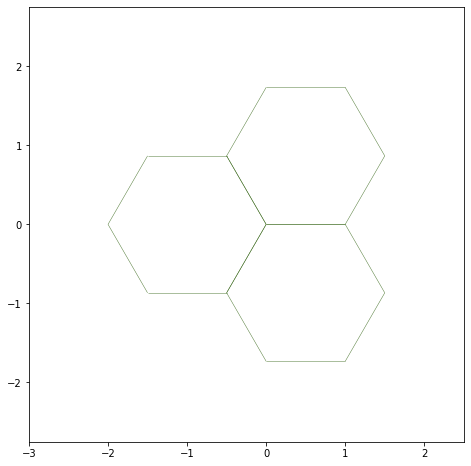

In [4]:
fig, ax = sheet_view(sheet, ['x', 'y'], **draw_specs)


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


### Showing the edges half-edges



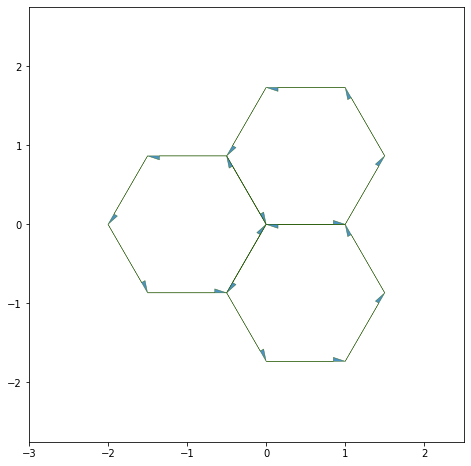

In [5]:
draw_specs['edge']['head_width'] = 0.1

fig, ax = sheet_view(sheet, ['x', 'y'], **draw_specs)


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

### Coloring

For vertices, we can pass color as a matplotlib color map:

In [6]:

## Let's add a column to sheet.vert_df
sheet.vert_df['rand'] = np.linspace(0.0, 1.0, num=sheet.vert_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.vert_df.rand)
draw_specs['vert']['visible'] = True

draw_specs['vert']['color'] = color_cmap
draw_specs['vert']['alpha'] = 0.5
draw_specs['vert']['s'] = 500

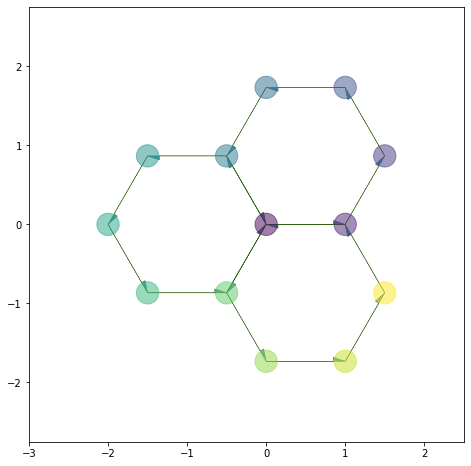

In [7]:
coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

#### Filling the cells

For faces and edges, we can pass directly an array or a `pd.Series`:



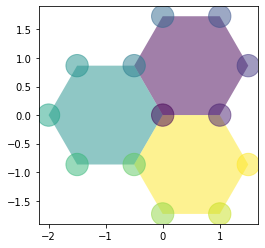

In [8]:
sheet.face_df['color'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

draw_specs['edge']['visible'] = False

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = sheet.face_df['color']
draw_specs['face']['alpha'] = 0.5


fig, ax = sheet_view(sheet, coords, **draw_specs)

In [9]:
draw_specs['edge']['visible'] = True

draw_specs['face']['color'] = sheet.face_df['color']
draw_specs['face']['alpha'] = 0.2

edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

draw_specs['edge']['color'] = edge_color

# Edge width can be passed as a parameter also (in 2D only)
draw_specs['edge']['width'] = 8. * np.linspace(
    0.0, 1.0, num=sheet.edge_df.shape[0]
)


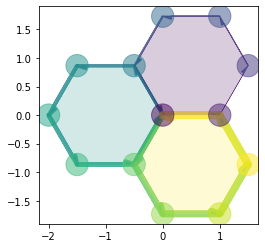

In [10]:
fig, ax = sheet_view(sheet, coords, **draw_specs)

### Numbering the faces or vertices

In tough to debug situations, it can be useful to print on the graph the face and vertex indices:



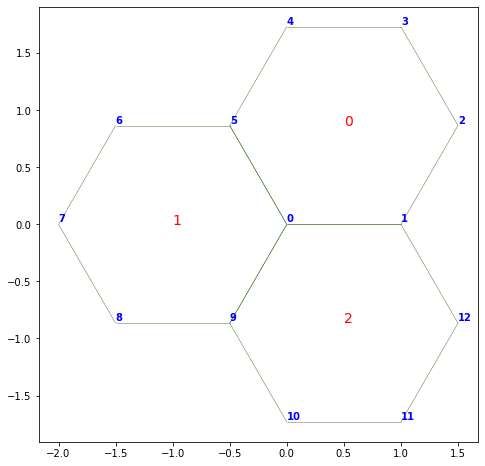

In [17]:
fig, ax = sheet_view(sheet)
fig.set_size_inches(8, 8)

for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face, fontsize=14, color="r")

for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.02, vert, weight="bold", color="blue")

## Ipyvolume based

In [42]:


extruded = extrude(sheet.datasets, method='translation')
monolayer = Monolayer('mono', extruded)

MonolayerGeometry.update_all(monolayer)

ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D")
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

### Vertex based color


With IPyvolume vertices are not represented. Edge color can be specified on a vertex basis or on an edge basis.

In [43]:
color = (monolayer.vert_df.x**2
         + monolayer.vert_df.y**2
         + monolayer.vert_df.z**2)


ipv.clear()
fig2, mesh = sheet_view(monolayer, edge={"color":color}, mode="3D")
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

#### Edge based color

In [44]:
color = monolayer.edge_df['dy']
ipv.clear()
fig2, mesh = sheet_view(monolayer, edge={"color":color}, mode="3D")
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

### Displaying faces

In [45]:
draw_specs = config.draw.sheet_spec()

draw_specs['face']['visible'] = True

#draw_specs['face']['visible'] = False
draw_specs['face']['color'] = np.random.random(monolayer.face_df.shape[0])

draw_specs['face']['alpha'] = 0.5

ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", **draw_specs)
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

### Higlighting faces

In [46]:
from tyssue.draw import highlight_cells, highlight_faces

In [47]:
highlight_faces(monolayer.face_df, [0, 2, 3], reset_visible=True)

ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", **draw_specs)
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

In [48]:
highlight_cells(monolayer, 1, reset_visible=True)

ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", **draw_specs)
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

For edges and faces, we can pass a callable as argument, as long as it takes an epithelium object as first argument end returns an array-like object of correct size:

In [74]:
def sqradius(epithelium):
    print("computing color value")
    return (epithelium.face_df[['x', 'y', 'z']]**2).sum(axis=1).to_numpy()

# we pass the function itself as a parameter, not the 
draw_specs['face']['color'] = sqradius
draw_specs['face']['visible'] = 1
monolayer.face_df["visible"] = True


ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", **draw_specs)
fig2

computing color value


Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

computing color value


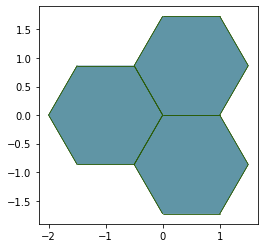

In [76]:
fig, ax = sheet_view(monolayer, mode="2D", **draw_specs)

This allows to update the color values at the time we draw the tissue without explicitly changing the arguments.

This has yet to be implemented for element-level visibility also.
